In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [107]:
# load data
WF_CSV = 'wfhours_base.csv'
TOTAL_CITY = 20
TOTAL_STATE = 20
df = pd.read_csv(WF_CSV)
df = df.drop(['id', 'atmospheric_pressure', 'wind', 'relative_humidity', 'last_update', 'weather', 'locality_id', 'region_name'], axis=1)
df.head(10)

,temp,date_time,locality_name,code
0,25,2018-01-07 15:00:00,Assis Brasil,AC
1,27,2019-01-06 14:00:00,Águas da Prata,SP
2,30,2019-01-06 16:00:00,Águas da Prata,SP
3,31,2019-01-06 16:00:00,Acrelândia,AC
4,32,2019-01-06 16:00:00,Assis Brasil,AC
5,34,2019-01-06 16:00:00,Anadia,AL
6,29,2019-01-06 16:00:00,Calçoene,AP
7,32,2019-01-06 16:00:00,Amaturá,AM
8,32,2019-01-06 16:00:00,Abaré,BA
9,35,2019-01-06 16:00:00,Abaiara,CE


/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


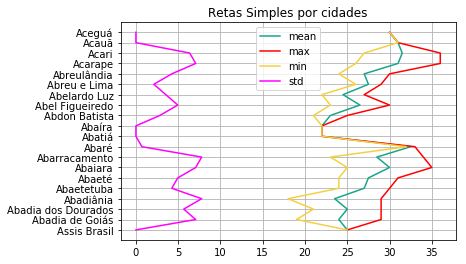

In [106]:
df['datetime'] = pd.to_datetime(df['date_time'])
df_mean = df.set_index('datetime').to_period(freq='D').reset_index().groupby(['datetime', 'locality_name', 'code']).mean().reset_index()
df_index = df_mean.head(TOTAL_CITY)

df_max = df.set_index('datetime').to_period(freq='D').reset_index().drop(['date_time'], axis=1).groupby(['datetime', 'locality_name', 'code']).max().reset_index()
df_index2 = df_max.head(TOTAL_CITY)
df_min = df.set_index('datetime').to_period(freq='D').reset_index().drop(['date_time'], axis=1).groupby(['datetime', 'locality_name', 'code']).min().reset_index()
df_index3 = df_min.head(TOTAL_CITY)
df_std = df.set_index('datetime').to_period(freq='D').reset_index().drop(['date_time'], axis=1).groupby(['datetime', 'locality_name', 'code']).std().reset_index()
df_std = df_std.fillna(0)
df_index4 = df_std.head(TOTAL_CITY)

fig = plt.figure()
graph1 = fig.add_subplot(1,1,1)
graph1.plot(df_index['temp'], df_index['locality_name'], color='#17a589', label='mean')

graph2 = fig.add_subplot(1,1,1)
graph2.plot(df_index2['temp'], df_index2['locality_name'], color='red', label='max')

graph3 = fig.add_subplot(1,1,1)
graph3.plot(df_index3['temp'], df_index3['locality_name'], color='#f4d03f', label='min')

graph4 = fig.add_subplot(1,1,1)
graph4.plot(df_index4['temp'], df_index4['locality_name'], color='#FF00FF', label='std')

plt.grid(True)
plt.title('Retas Simples por cidades')
plt.legend()
plt.show()

/usr/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


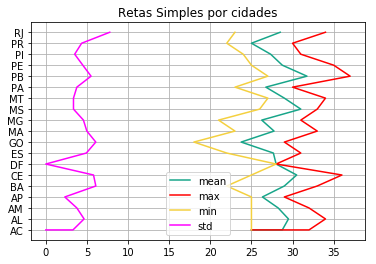

In [109]:
df['datetime'] = pd.to_datetime(df['date_time'])
df_mean = df.set_index('datetime').to_period(freq='D').reset_index().drop(['date_time', 'locality_name'], axis=1).groupby(['datetime', 'code']).mean().reset_index()
df_index = df_mean.head(TOTAL_CITY)

df_max = df.set_index('datetime').to_period(freq='D').reset_index().drop(['date_time', 'locality_name'], axis=1).groupby(['datetime', 'code']).max().reset_index()
df_index2 = df_max.head(TOTAL_CITY)
df_min = df.set_index('datetime').to_period(freq='D').reset_index().drop(['date_time', 'locality_name'], axis=1).groupby(['datetime', 'code']).min().reset_index()
df_index3 = df_min.head(TOTAL_CITY)
df_std = df.set_index('datetime').to_period(freq='D').reset_index().drop(['date_time', 'locality_name'], axis=1).groupby(['datetime', 'code']).std().reset_index()
df_std = df_std.fillna(0)
df_index4 = df_std.head(TOTAL_CITY)

fig = plt.figure()
graph1 = fig.add_subplot(1,1,1)
graph1.plot(df_index['temp'], df_index['code'], color='#17a589', label='mean')

graph2 = fig.add_subplot(1,1,1)
graph2.plot(df_index2['temp'], df_index2['code'], color='red', label='max')

graph3 = fig.add_subplot(1,1,1)
graph3.plot(df_index3['temp'], df_index3['code'], color='#f4d03f', label='min')

graph4 = fig.add_subplot(1,1,1)
graph4.plot(df_index4['temp'], df_index4['code'], color='#FF00FF', label='std')

plt.grid(True)
plt.title('Retas Simples por cidades')
plt.legend()
plt.show()